# Clustering and Regression

## Example 1

In [4]:
%matplotlib inline
from __future__ import print_function

import random

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression

# Plot the data

def set_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

Now we generate some sample data.

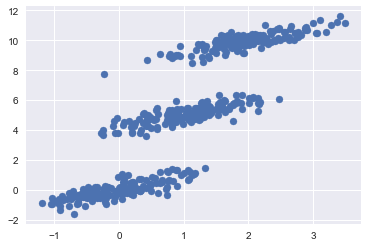

In [5]:
## Create some synthetic data

from scipy.stats import multivariate_normal
data = []
# dist = multivariate_normal(mean=[0,0], cov=[[0.5, 0.1],[0,0.01]])
dist = multivariate_normal(mean=[0, 0], cov=[[0.5, 0.5],[0,0.1]])
for i in range(150):
    p = list(dist.rvs())
    data.append(dist.rvs())
# dist = multivariate_normal(mean=[1,5], cov=[[0.5, 0.2],[0,0.02]])
dist = multivariate_normal(mean=[1, 5], cov=[[0.5, 0.5],[0,0.1]])
for i in range(150):
    data.append(dist.rvs())
dist = multivariate_normal(mean=[2, 10], cov=[[0.5, 0.5],[0,0.1]])
for i in range(150):
    data.append(dist.rvs())

    
df = pd.DataFrame(data, columns=["x", "y"])
df.head()
plt.scatter(df['x'], df['y'])
plt.show()

## Find Clusters


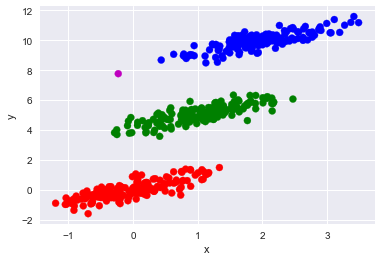

In [6]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=0.8, min_samples=10)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Add Cluster Labels back to the Data Frame and Fit a Regression Model

In [7]:
df["cluster"] = labels
df = pd.concat([df, pd.get_dummies(df['cluster'], prefix="cluster")], axis=1)
df.head()

,x,y,cluster,cluster_-1,cluster_0,cluster_1,cluster_2
0,1.005022,1.140579,0,0,1,0,0
1,1.336336,1.497508,0,0,1,0,0
2,0.838458,0.624514,0,0,1,0,0
3,-0.879701,-0.411110,0,0,1,0,0
4,0.082111,-0.216284,0,0,1,0,0


In [8]:
model = LinearRegression()
X = df[["x"]]
y = df['y']
model.fit(X, y)

print(model.score(X, y))

0.750961745444


/Users/665066/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


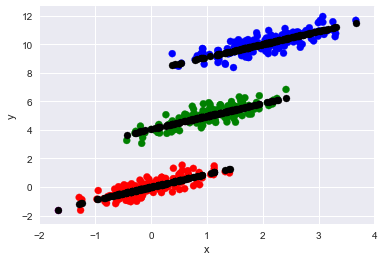

In [54]:
# Plot the model
colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")

plt.scatter(df["x"], model.predict(X), color='black')

plt.show()


## Example 2

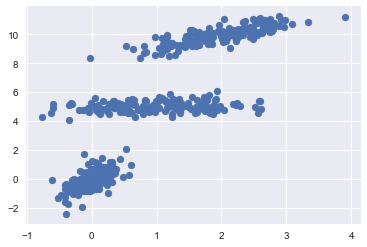

In [9]:
## Create some synthetic data

from scipy.stats import multivariate_normal
data = []
# dist = multivariate_normal(mean=[0,0], cov=[[0.5, 0.1],[0,0.01]])
dist = multivariate_normal(mean=[0, 0], cov=[[0.1, 0.5],[0,0.2]])
for i in range(150):
    p = list(dist.rvs())
    data.append(dist.rvs())
dist = multivariate_normal(mean=[1, 5], cov=[[0.6, 0.],[0.2 ,0.1]])
for i in range(150):
    data.append(dist.rvs())
dist = multivariate_normal(mean=[2, 10], cov=[[0.5, 0.5],[0,0.1]])
for i in range(150):
    data.append(dist.rvs())

    
df = pd.DataFrame(data, columns=["x", "y"])
df.head()
plt.scatter(df['x'], df['y'])
plt.show()

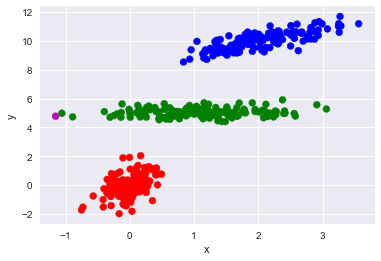

In [56]:
# Fit a clustering estimator and fit a model



## Example 3: Optional How to Put Everything Together?

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.704978749608


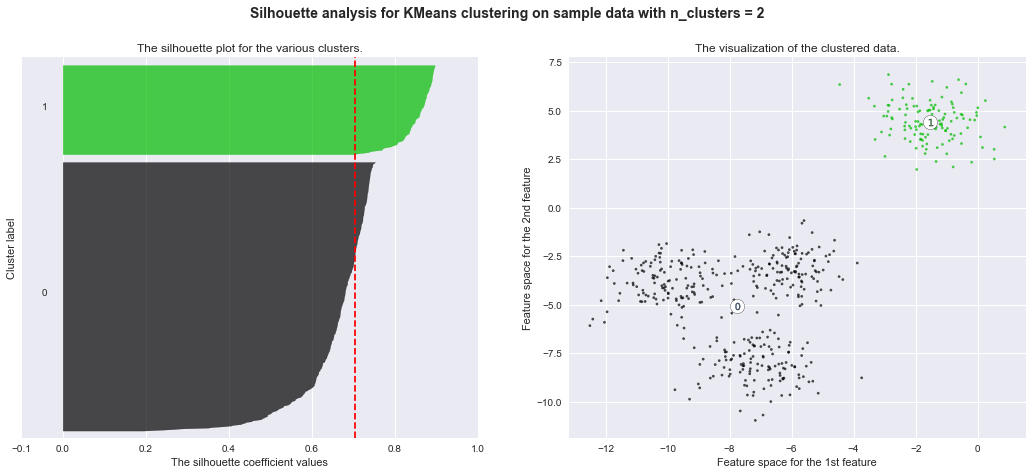

For n_clusters = 3 The average silhouette_score is : 0.588200401213


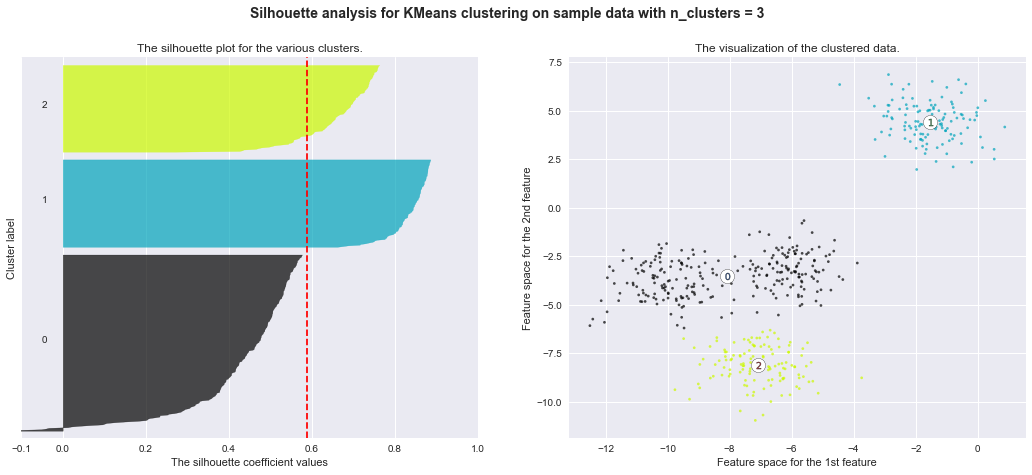

For n_clusters = 4 The average silhouette_score is : 0.650518663273


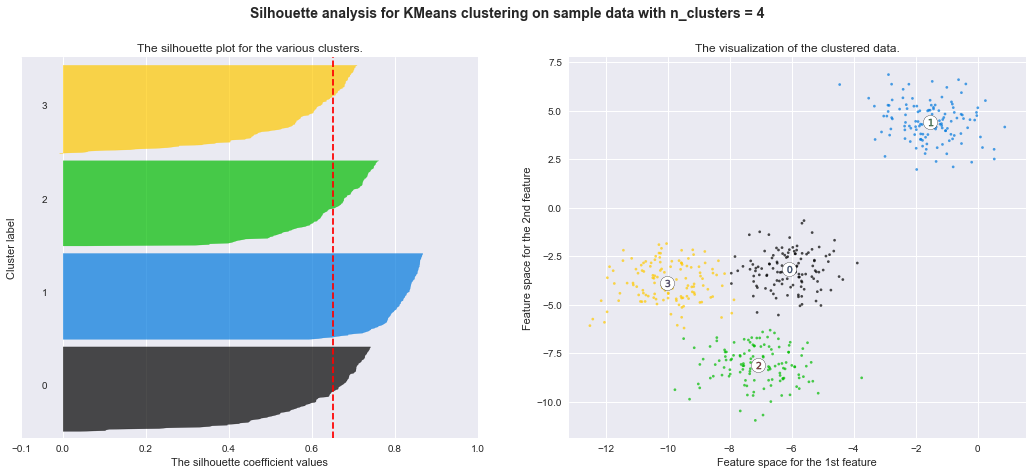

For n_clusters = 5 The average silhouette_score is : 0.563764690262


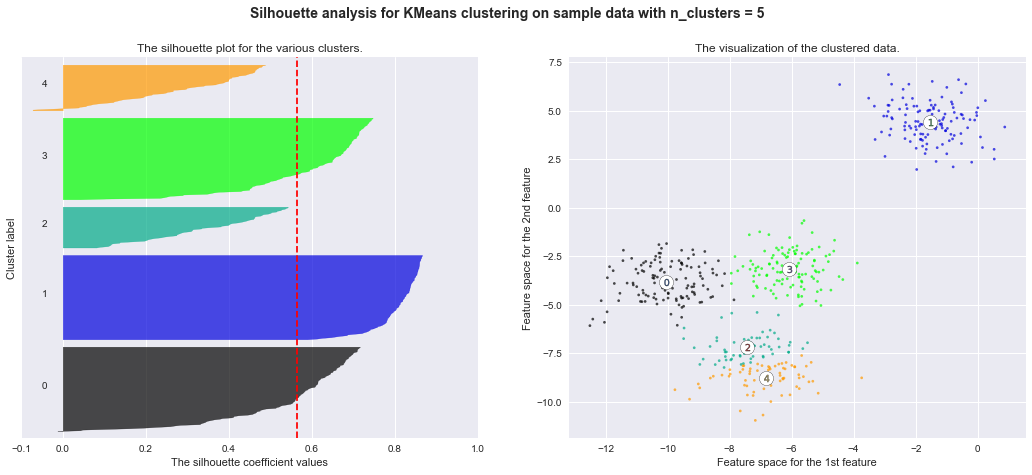

For n_clusters = 6 The average silhouette_score is : 0.450466629437


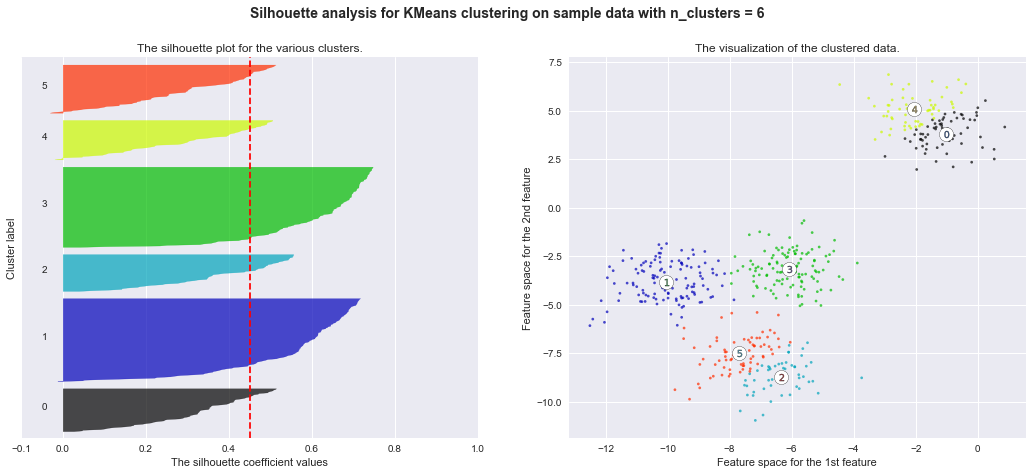

In [11]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
